# Importation des données 

In [72]:
import pandas as pd 

data = pd.read_csv('diabetes.csv.xls')

data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


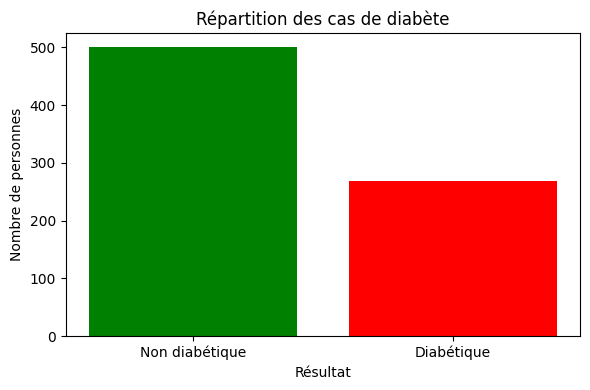

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# je charges les données
data = pd.read_csv('diabetes.csv.xls')

# ici je compte le nombre de cas positifs et négatifs
compte = data['Outcome'].value_counts()


compte.index = ['Non diabétique', 'Diabétique']

# Création du diagramme en barres
plt.figure(figsize=(6,4))
plt.bar(compte.index, compte.values, color=['green', 'red'])
plt.title("Répartition des cas de diabète")
plt.ylabel("Nombre de personnes")
plt.xlabel("Résultat")
plt.tight_layout()
plt.show()


# Afficher des infos générales sur les données

In [74]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [75]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



# Transformer les colonnes Age et Glucose en groupes

In [76]:
# On découpe l'âge en groupes
bins_age = [0, 20, 30, 40, 50, 60, 120]  
labels_age = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']  # les noms des groupes

data['AgeGroup'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age)


In [77]:
# On découpe les niveaux de glucose
bins_glucose = [0, 99, 125, 200]
labels_glucose = ['Normal', 'Pré-diabète', 'Élevé']

data['GlucoseLevel'] = pd.cut(data['Glucose'], bins=bins_glucose, labels=labels_glucose)


In [78]:
data[['Age', 'AgeGroup', 'Glucose', 'GlucoseLevel']].head(10)




,Age,AgeGroup,Glucose,GlucoseLevel
0,50,40-50,148,Élevé
1,31,30-40,85,Normal
2,32,30-40,183,Élevé
3,21,20-30,89,Normal
4,33,30-40,137,Élevé
5,30,20-30,116,Pré-diabète
6,26,20-30,78,Normal
7,29,20-30,115,Pré-diabète
8,53,50-60,197,Élevé
9,54,50-60,125,Pré-diabète


In [79]:
print(data['AgeGroup'].value_counts())
print(data['GlucoseLevel'].value_counts())
# Suppriession les lignes où AgeGroup, GlucoseLevel ou Outcome sont manquants
sunburst_data = data.dropna(subset=['AgeGroup', 'GlucoseLevel', 'Outcome'])


AgeGroup
20-30    417
30-40    157
40-50    113
50-60     54
60+       27
<20        0
Name: count, dtype: int64
GlucoseLevel
Élevé          297
Pré-diabète    274
Normal         192
Name: count, dtype: int64


# Diagramme en coin pour etude 

In [84]:
import plotly.express as px

def filtrer_donnees_sunburst(data, niveaux_glucose=['Pré-diabète', 'Élevé'], groupes_age=['30-40', '40-50']):
    """Filtre les données selon le niveau de glucose et le groupe d'âge."""
    data_filtrée = data[
        data['GlucoseLevel'].isin(niveaux_glucose) &
        data['AgeGroup'].isin(groupes_age)
    ].dropna(subset=['AgeGroup', 'GlucoseLevel', 'Outcome'])
    return data_filtrée

def ajouter_outcome_label(data):
    """Ajoute un label lisible pour la colonne 'Outcome'."""
    data['OutcomeLabel'] = data['Outcome'].map({0: 'Non diabétique', 1: 'Diabétique'})
    return data

def afficher_sunburst(data, titre='Sous-groupe ciblé : 30-50 ans avec Glucose élevé ou prédiabète'):
    """Affiche le graphique sunburst basé sur AgeGroup → GlucoseLevel → Outcome."""
    fig = px.sunburst(
        data,
        path=['AgeGroup', 'GlucoseLevel', 'OutcomeLabel'],
        values=None,
        color='OutcomeLabel',
        color_discrete_map={
            'Diabétique': 'red',
            'Non diabétique': 'green'
        },
        title=titre
    )
    fig.show()

# ====== Pipeline complet ======

def generer_sunburst_diabete(data):
    """Pipeline pour générer un graphique sunburst filtré par âge et glucose."""
    data_filtrée = filtrer_donnees_sunburst(data)
    data_labellisée = ajouter_outcome_label(data_filtrée)
    afficher_sunburst(data_labellisée)
generer_sunburst_diabete(data)


In [83]:
import plotly.graph_objects as go

def filtrer_donnees_sankey(data, niveaux_glucose=['Pré-diabète', 'Élevé'], groupes_age=['30-40', '40-50']):
    """Filtre les données selon le niveau de glucose et le groupe d'âge."""
    data_filtrée = data[
        data['GlucoseLevel'].isin(niveaux_glucose) &
        data['AgeGroup'].isin(groupes_age)
    ].dropna(subset=['AgeGroup', 'GlucoseLevel', 'Outcome'])
    return data_filtrée

def ajouter_labels_outcome(data):
    """Ajoute des labels explicites pour l'issue du diabète."""
    data['OutcomeLabel'] = data['Outcome'].map({0: 'Non diabétique', 1: 'Diabétique'})
    return data

def construire_labels(data):
    """Construit les étiquettes uniques pour les nœuds du Sankey."""
    age_labels = data['AgeGroup'].unique().tolist()
    glucose_labels = data['GlucoseLevel'].unique().tolist()
    outcome_labels = ['Non diabétique', 'Diabétique']
    return age_labels, glucose_labels, outcome_labels, age_labels + glucose_labels + outcome_labels

def construire_liens_sankey(data, age_labels, glucose_labels, outcome_labels, labels):
    """Construit les sources, cibles et valeurs pour les liens du diagramme Sankey."""
    source = []
    target = []
    values = []

    # AgeGroup → GlucoseLevel
    for age in age_labels:
        for glucose in glucose_labels:
            count = len(data[(data['AgeGroup'] == age) & (data['GlucoseLevel'] == glucose)])
            if count > 0:
                source.append(labels.index(age))
                target.append(labels.index(glucose))
                values.append(count)

    # GlucoseLevel → Outcome
    for glucose in glucose_labels:
        for outcome in outcome_labels:
            count = len(data[(data['GlucoseLevel'] == glucose) & (data['OutcomeLabel'] == outcome)])
            if count > 0:
                outcome_index = len(age_labels) + len(glucose_labels) + outcome_labels.index(outcome)
                source.append(labels.index(glucose))
                target.append(outcome_index)
                values.append(count)

    return source, target, values

def afficher_diagramme_sankey(labels, source, target, values, titre='Flux : Age → Glucose → Diabète'):
    """Affiche le diagramme de Sankey."""
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color='black', width=0.5),
            label=labels
        ),
        link=dict(source=source, target=target, value=values)
    )])

    fig.update_layout(title_text=titre, font_size=12)
    fig.show()

# ====== Pipeline complet ======

def generer_sankey_diabete(data):
    """Pipeline complet pour générer un Sankey sur Age → Glucose → Outcome."""
    data_filtrée = filtrer_donnees_sankey(data)
    data_labellisée = ajouter_labels_outcome(data_filtrée)
    age_labels, glucose_labels, outcome_labels, labels = construire_labels(data_labellisée)
    source, target, values = construire_liens_sankey(data_labellisée, age_labels, glucose_labels, outcome_labels, labels)
    afficher_diagramme_sankey(labels, source, target, values)


generer_sankey_diabete(data)


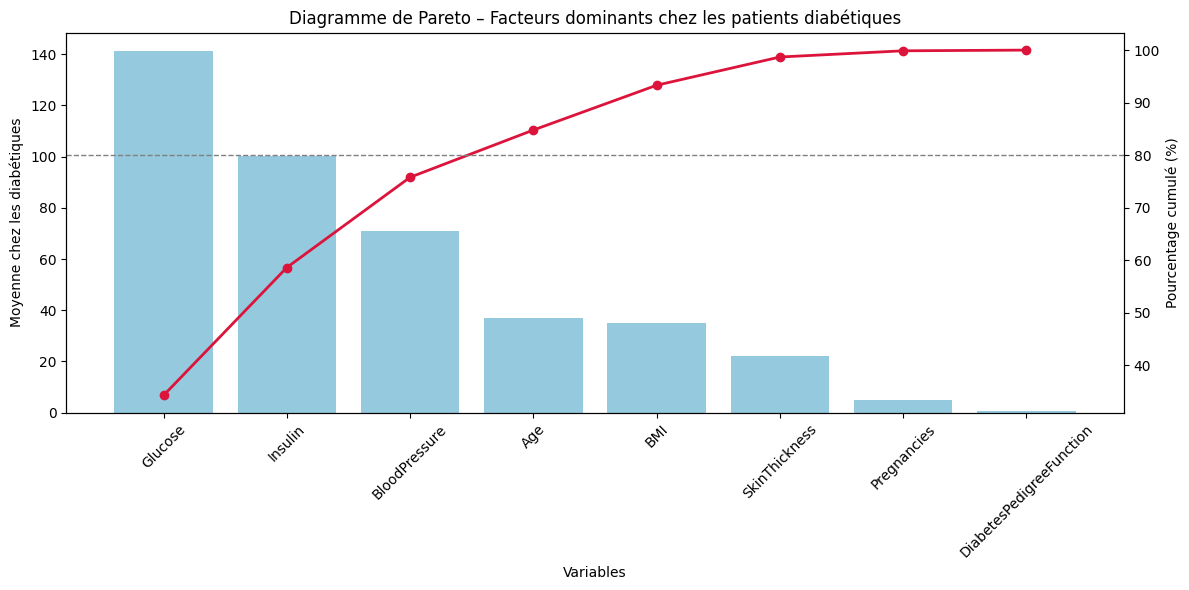

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

def filtrer_donnees_diabetiques(data):
    """Filtre les patients diabétiques."""
    return data[data['Outcome'] == 1]

def selectionner_colonnes_quantitatives():
    """Retourne la liste des colonnes quantitatives d'intérêt."""
    return ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

def calculer_moyennes(data, colonnes):
    """Calcule les moyennes des colonnes sélectionnées et les trie."""
    return data[colonnes].mean().sort_values(ascending=False)

def calculer_pourcentage_cumule(moyennes):
    """Calcule le pourcentage cumulé à partir des moyennes."""
    return moyennes.cumsum() / moyennes.sum() * 100

def afficher_diagramme_pareto(moyennes, pourcentage_cumule):
    """Affiche le diagramme de Pareto."""
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Barres : valeurs moyennes
    sns.barplot(x=moyennes.index, y=moyennes.values, ax=ax1, color='skyblue')
    ax1.set_ylabel("Moyenne chez les diabétiques")
    ax1.set_xlabel("Variables")
    ax1.tick_params(axis='x', rotation=45)

    # Courbe : pourcentage cumulé
    ax2 = ax1.twinx()
    ax2.plot(moyennes.index, pourcentage_cumule, color='crimson', marker='o', linestyle='-', linewidth=2)
    ax2.set_ylabel("Pourcentage cumulé (%)")
    ax2.axhline(80, color='gray', linestyle='--', linewidth=1)

    # Titre
    plt.title("Diagramme de Pareto – Facteurs dominants chez les patients diabétiques")
    plt.tight_layout()
    plt.show()

# ====== Utilisation des fonctions ======

def generer_pareto_diabetiques(data):
    """Pipeline complet pour générer un diagramme de Pareto des diabétiques."""
    data_diabetiques = filtrer_donnees_diabetiques(data)
    colonnes = selectionner_colonnes_quantitatives()
    moyennes = calculer_moyennes(data_diabetiques, colonnes)
    pourcentage_cumule = calculer_pourcentage_cumule(moyennes)
    afficher_diagramme_pareto(moyennes, pourcentage_cumule)







generer_pareto_diabetiques(data)
